In [30]:
%matplotlib qt4
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
from prettytable import PrettyTable
from sklearn.cross_validation import train_test_split
import numpy as np
print (__doc__)

Automatically created module for IPython interactive environment


In [31]:
filename="PhilipsHackabout/preprocessed/amlodipine.csv"
f = open(filename)
f.readline()
data = np.loadtxt(fname = f, delimiter = ',',dtype='double')
Y = data[:,0]
X = data[:, 1:data.shape[1]-1]

# Reading the labels now
f= open(filename)
labels_=np.loadtxt(fname=f,delimiter=',',dtype='string')
labels_=labels_[0,1:]

In [32]:
#Normalizing to Zero Mean Unit Variance
mean = X.mean(axis=0)
std = X.std(axis=0)
X = (X - mean) / std

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.3)

Decision Tree Classification Score:  1.0


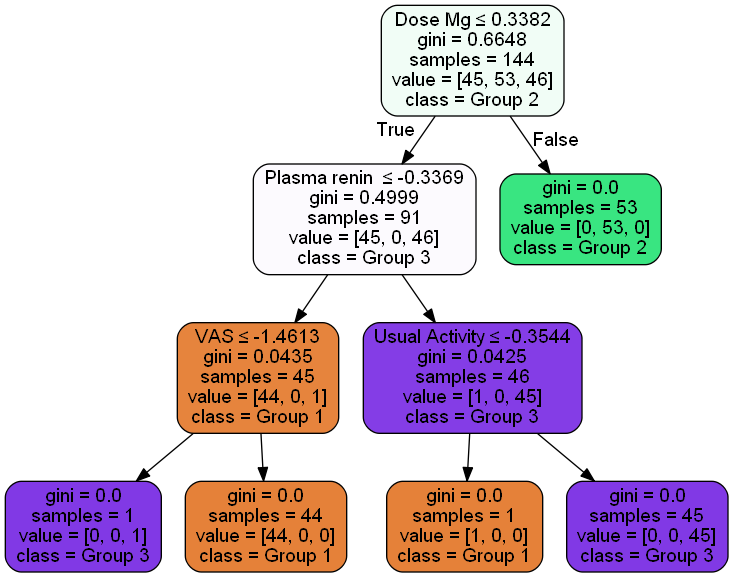

In [40]:
 from sklearn.datasets import load_iris
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
score = clf.score(X_test, y_test)
print 'Decision Tree Classification Score: ',score

from sklearn.externals.six import StringIO  

import pydotplus
from IPython.display import Image  
dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=labels_,  
                         class_names=['Group 1','Group 2','Group 3'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png()) 